<a href="https://colab.research.google.com/github/goboy2005/R/blob/main/Linear%20Regression%202%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
launch<-read.csv("challenger.csv",header = T)

In [5]:
str(launch)

'data.frame':	23 obs. of  4 variables:
 $ distress_ct         : int  0 1 0 0 0 0 0 0 1 1 ...
 $ temperature         : int  66 70 69 68 67 72 73 70 57 63 ...
 $ field_check_pressure: int  50 50 50 50 50 50 100 100 200 200 ...
 $ flight_num          : int  1 2 3 4 5 6 7 8 9 10 ...


In [6]:
cor(launch$temperature,launch$distress_ct)

[1] -0.5111264

In [7]:
#설명 피어슨 상관계수가 
cor(launch)

,distress_ct,temperature,field_check_pressure,flight_num
distress_ct,1.0000000,-0.51112639,0.28466627,0.1735779
temperature,-0.5111264,1.00000000,0.03981769,0.2307702
field_check_pressure,0.2846663,0.03981769,1.00000000,0.8399324
flight_num,0.1735779,0.23077017,0.83993237,1.0000000


In [8]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




In [9]:
library(psych)

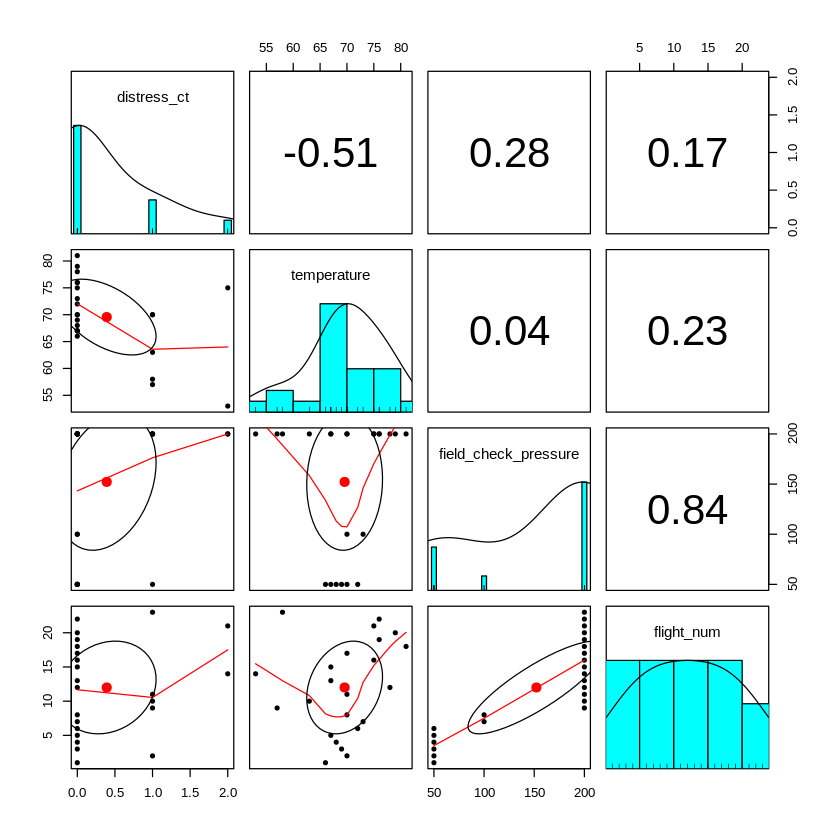

In [10]:
pairs.panels(launch)

In [22]:
K<-read.csv("K_index.csv",header = T,stringsAsFactors = F)

In [23]:
S<-read.csv("S_stock.csv",header=T,stringsAsFactors = F)

In [24]:
H<-read.csv('H_stock.csv',header=T,stringsAsFactors = F)

In [26]:
str(H)

'data.frame':	249 obs. of  3 variables:
 $ date   : chr  "2015-03-25" "2015-03-26" "2015-03-27" "2015-03-30" ...
 $ h_price: num  45500 45900 45000 45600 46000 ...
 $ h_rate : num  NA 0.879 -1.961 1.333 0.877 ...


In [36]:
cor(na.omit(K$k_rate),na.omit(S$s_rate))
cor(na.omit(K$k_rate),na.omit(H$h_rate))

[1] 0.5142455

[1] 0.3262777

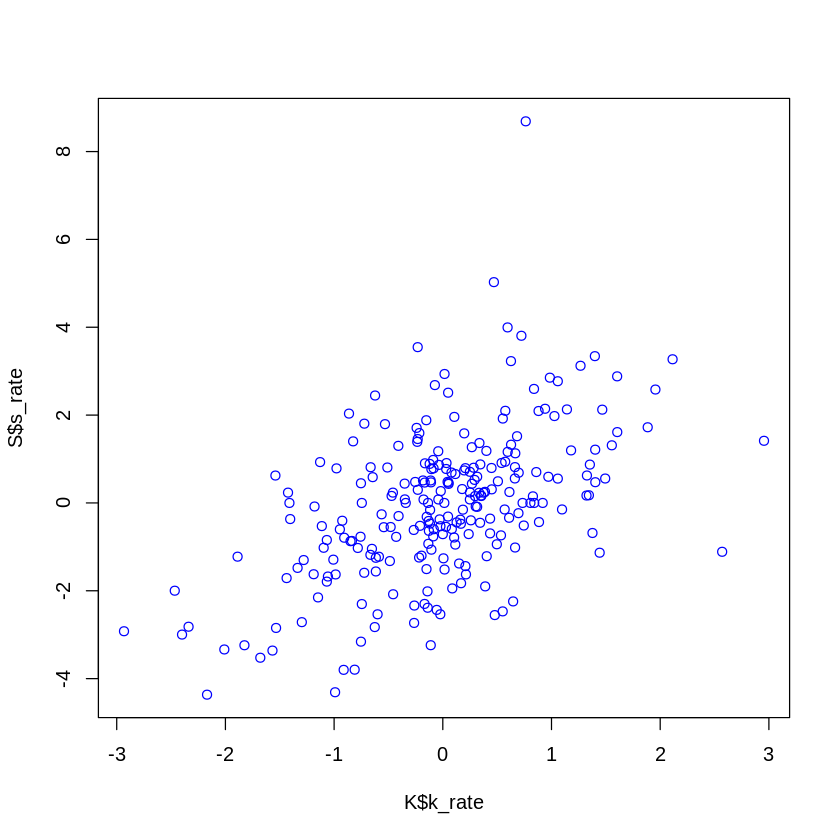

In [37]:
plot(K$k_rate,S$s_rate,col='blue',bg='blue')

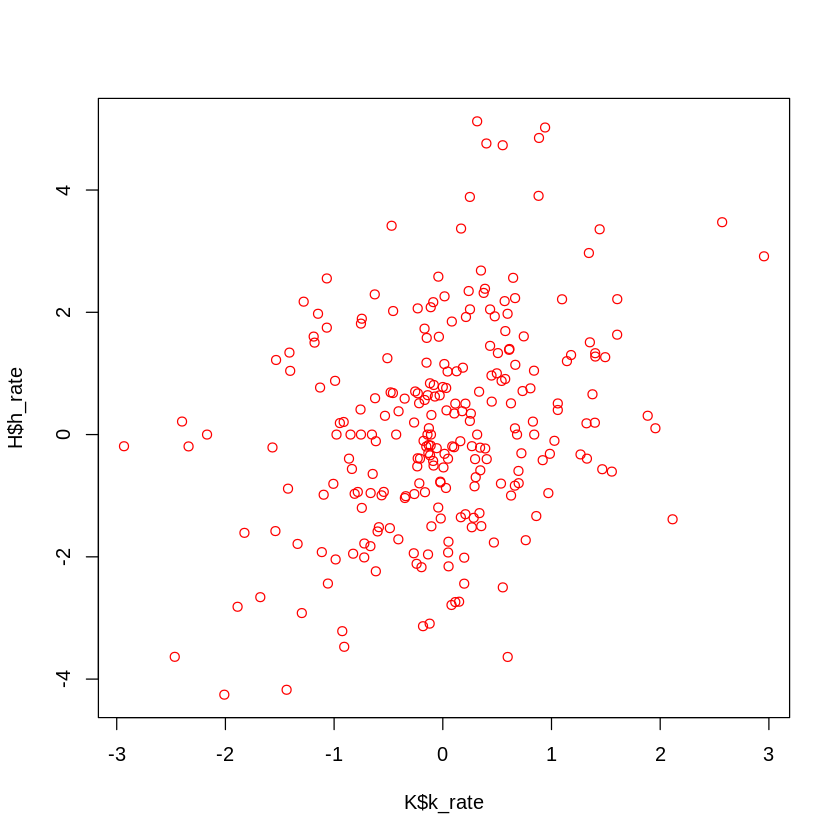

In [40]:
plot(K$k_rate,  H$h_rate ,col='red',bg='red')

In [42]:
all_data<-merge(merge(K,S),H)

In [ ]:
str(all_data)

In [45]:
head(all_data)

,date,kospi,k_rate,s_price,s_rate,h_price,h_rate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-03-25,2042.81,NA,1485000,NA,45500,NA
2,2015-03-26,2022.56,-0.991,1421000,-4.310,45900,0.879
3,2015-03-27,2019.80,-0.136,1421000,0.000,45000,-1.961
4,2015-03-30,2030.04,0.507,1428000,0.493,45600,1.333
5,2015-03-31,2041.03,0.541,1441000,0.910,46000,0.877
6,2015-04-01,2028.45,-0.616,1423000,-1.249,45950,-0.109


In [46]:
attach(all_data)

In [ ]:
plot(k_rate,s_rate,col='blue')

In [48]:
model_s<-lm(s_rate~k_rate,data=all_data)

The following objects are masked from all_data (pos = 3):

    date, h_price, h_rate, k_rate, kospi, s_price, s_rate




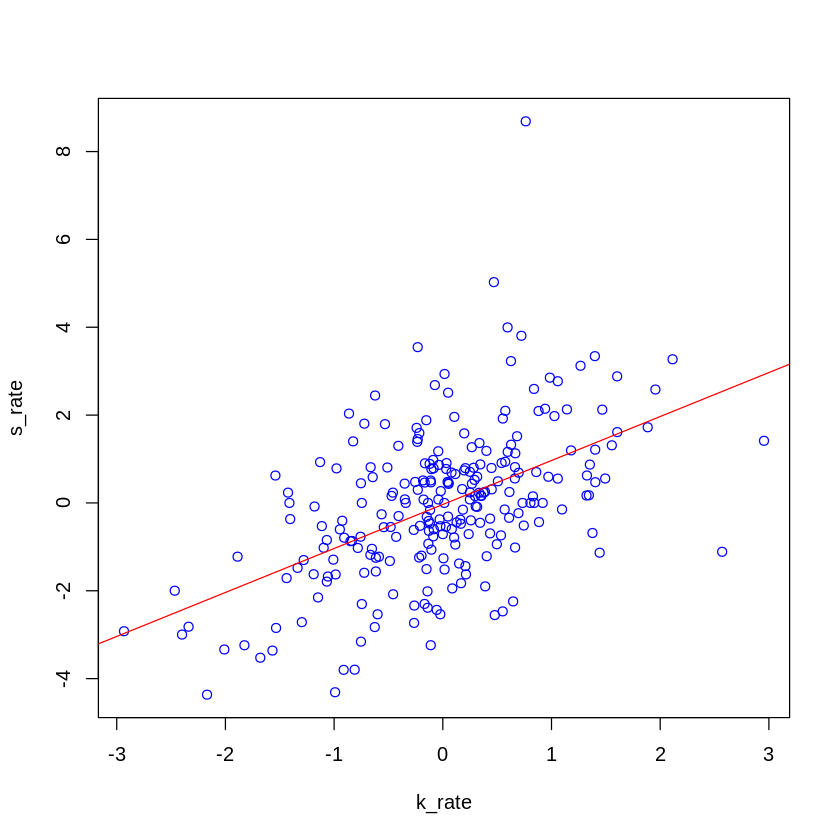

In [50]:
attach(all_data)
plot(k_rate,s_rate,col='blue')
model_s<-lm(s_rate~k_rate,data=all_data)
abline(model_s,col='red') 

In [51]:
a<- matrix(c(1,2,3,4,5,6),nrow=3,ncol=2,byrow=T)

In [52]:
a

1,2
3,4
5,6


In [53]:
t(a)

1,3,5
2,4,6


In [54]:
b<- diag(3)

In [55]:
b

1,0,0
0,1,0
0,0,1


In [62]:
#R 에서의 곱하기 --> %*% 
a<-matrix(c(1,2,3,4,5,6,7,8,9),nrow=3,ncol=3,byrow = T) 

In [63]:
a

1,2,3
4,5,6
7,8,9


In [61]:
a %*% diag(3)

1,2,3
4,5,6
7,8,9


In [64]:
a<-matrix(c(1,2,3,4), nrow=2,ncol=2,byrow = T)

In [65]:
a %*% diag(2)

1,2
3,4


In [73]:
c<- a %*% solve(a)
round(c)

1,0
0,1


In [82]:
round(solve(a),)

-2,1
1,0


In [87]:
c<- matrix(c(1:12) ,nrow=3,ncol=4,byrow = T)  
c  

1,2,3,4
5,6,7,8
9,10,11,12


In [88]:
c %*% t(c)

30,70,110
70,174,278
110,278,446


In [2]:

reg <- function(y,x) {  
  x <- as.matrix(x)                        # 행렬로 변경하는 코드 
  x <- cbind( Intercept=1, x )        # 절편을 추가하는 코드 
  b <- solve( t(x) %*% x ) %*% t(x) %*% y   # 다중회귀의 회귀 계수 구하는 수학식
  colnames(b) <- "estimate"                   # 컬럼명을 지정 
  print (b)
                             }

In [9]:
launch <- read.csv('challenger.csv',header=T)
#launch
reg(y=launch$distress_ct, x= launch[   ,2:4] )
reg
#회귀식: y =  3.527093383  - 0.051385940 * X1 +   0.001757009 * X2 +  0.014292843 * X3
#설명: O형링 파손에 영향을 주는 가장 큰 독립변수는 온도이다. 그 다음이 비행기의 노후화를 나타내는 비행기 번호이다. 

                         estimate
Intercept             3.527093383
temperature          -0.051385940
field_check_pressure  0.001757009
flight_num            0.014292843


function(y,x) {  
  x <- as.matrix(x)                        # 행렬로 변경하는 코드 
  x <- cbind( Intercept=1, x )        # 절편을 추가하는 코드 
  b <- solve( t(x) %*% x ) %*% t(x) %*% y   # 다중회귀의 회귀 계수 구하는 수학식
  colnames(b) <- "estimate"                   # 컬럼명을 지정 
  print (b)
                             }
<bytecode: 0x563fe35bda10>

In [21]:
sports<-read.csv("sports.csv",header = T)
#summary(sports)
#str(sports)
#reg(y=sports$acceptance, x=sports[2:4])
attach(sports)
lm( acceptance ~  academic+sports + music, data= sports )
# 설명:  정규화를 안하고 영향도를 보았더니 sports 가 가장 높게 나옵니다.

The following object is masked _by_ .GlobalEnv:

    sports


The following objects are masked from sports (pos = 3):

    academic, acceptance, music, sports, X


The following objects are masked from sports (pos = 4):

    academic, acceptance, music, sports, X


The following objects are masked from sports (pos = 5):

    academic, acceptance, music, sports, X





Call:
lm(formula = acceptance ~ academic + sports + music, data = sports)

Coefficients:
(Intercept)     academic       sports        music  
    11.4903       0.1558       0.5727       0.1046  


In [23]:
normalize <- function(x)  {
                                    return  (  (x-min(x) ) / ( max(x) - min(x) )  ) 
                                   } 


In [ ]:
sports_n<-as.data.frame(lapply(sports,normalize))
#summary(sports_n)
attach(sports_n)
reg(y=acceptance, x=sports_n[,c(2:4)])
lm(formula=acceptance ~academic+ sports + music, data = sports_n)

In [43]:
insurance<- read.csv("insurance.csv",header=T)
head(insurance)



,age,sex,bmi,children,smoker,region,expenses
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.9,0,yes,southwest,16884.92
2,18,male,33.8,1,no,southeast,1725.55
3,28,male,33.0,3,no,southeast,4449.46
4,33,male,22.7,0,no,northwest,21984.47
5,32,male,28.9,0,no,northwest,3866.86
6,31,female,25.7,0,no,southeast,3756.62


In [45]:
colSums(is.na(insurance)) 

age      sex      bmi children   smoker   region expenses 
       0        0        0        0        0        0        0

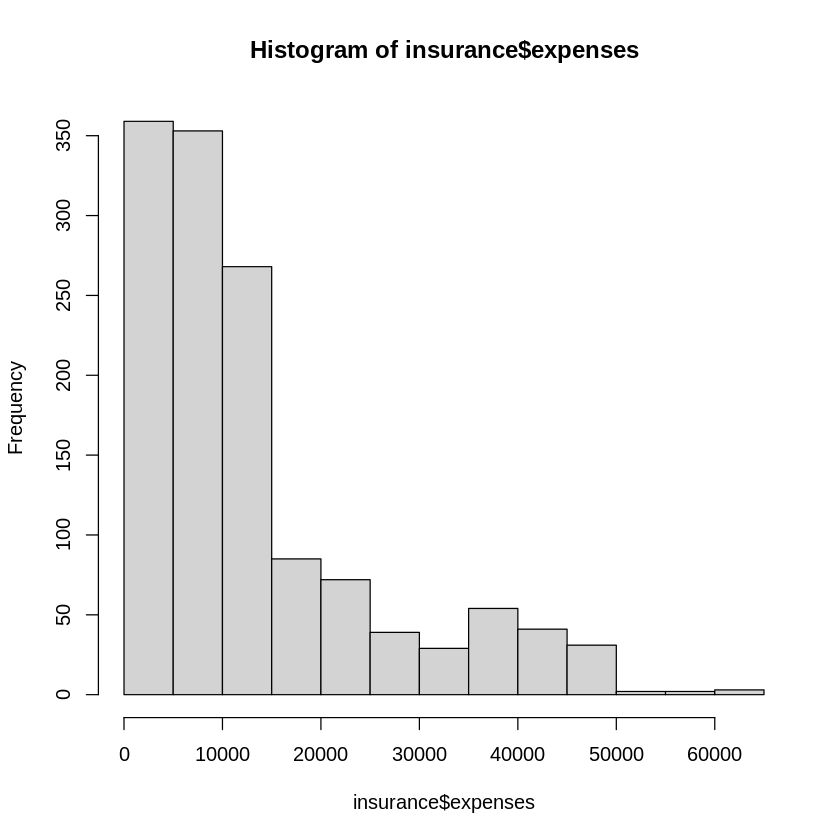

In [47]:
hist(insurance$expenses)

In [55]:
insurance_n<-as.data.frame(lapply(insurance[,c(1,3,4,7)],normalize  ))
summary(insurance_n)

      age              bmi            children        expenses      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.00000  
 1st Qu.:0.1957   1st Qu.:0.2776   1st Qu.:0.000   1st Qu.:0.05776  
 Median :0.4565   Median :0.3881   Median :0.200   Median :0.13185  
 Mean   :0.4610   Mean   :0.3953   Mean   :0.219   Mean   :0.19392  
 3rd Qu.:0.7174   3rd Qu.:0.5040   3rd Qu.:0.400   3rd Qu.:0.24770  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.00000  

In [57]:
cor(insurance[,c("age","bmi","children","expenses")])

,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000


In [62]:
library(psych)

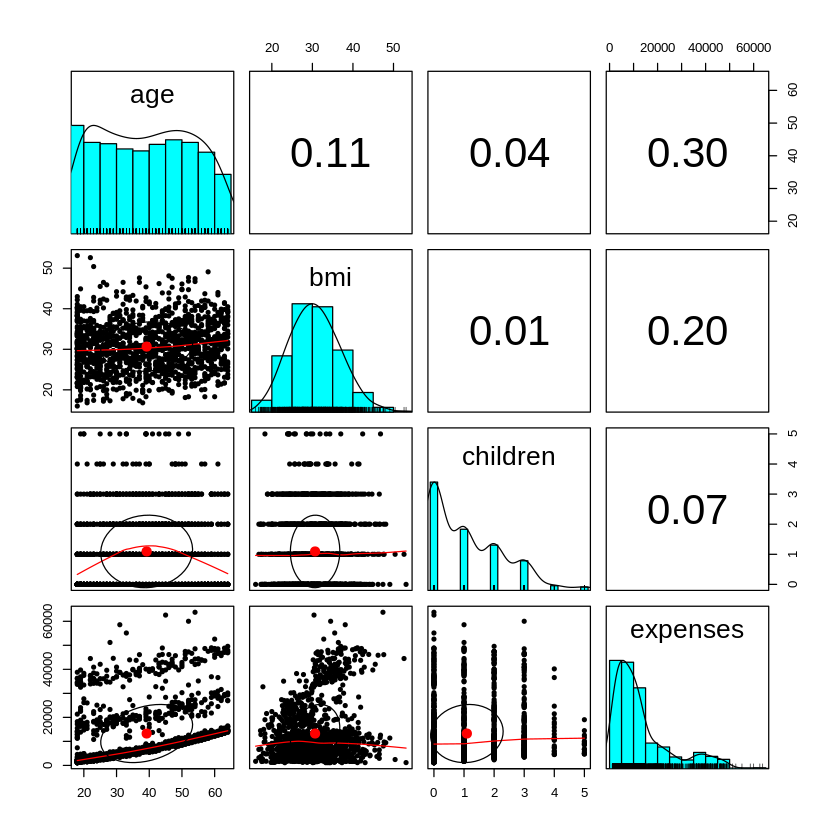

In [64]:
pairs.panels(insurance[,c('age','bmi','children','expenses')])

In [67]:
attach(insurance)
m5<-lm(expenses~.,data=insurance)
m5

The following objects are masked from insurance (pos = 3):

    age, bmi, children, expenses, region, sex, smoker


The following objects are masked from insurance (pos = 4):

    age, bmi, children, expenses, region, sex, smoker





Call:
lm(formula = expenses ~ ., data = insurance)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11941.6            256.8           -131.4            339.3  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.7          23847.5           -352.8          -1035.6  
regionsouthwest  
         -959.3  
